Install packages.

In [1]:
!pip install yahoofinancials
!pip install yfinance 

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests

**1. Data Loading**

1. a. Extract and store the S&P 500 Tickers from 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies '  using Pandas.

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
#table = pd.read_html(url, storage_options={"User-Agent": "Mozilla/5.0"})
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
response.raise_for_status()   # ensure no HTTP errors

table = pd.read_html(response.text)
print(table[1])


    Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North 

/tmp/ipykernel_46058/2899319010.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(response.text)


In [4]:
SP500 = table[1]
symbol = " ".join([str(x) for x in SP500['Symbol']])
ticker = yf.Ticker(symbol)
print(ticker)

yfinance.Ticker object <MMM AOS ABT ABBV ACN ADBE AMD AES AFL A APD ABNB AKAM ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AEP AXP AIG AMT AWK AMP AME AMGN APH ADI AON APA APO AAPL AMAT APP APTV ACGL ADM ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY AXON BKR BALL BAC BAX BDX BRK.B BBY TECH BIIB BLK BX XYZ BK BA BKNG BSX BMY AVGO BR BRO BF.B BLDR BG BXP CHRW CDNS CPT CPB COF CAH CCL CARR CAT CBOE CBRE CDW COR CNC CNP CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH COIN CL CMCSA CAG COP ED STZ CEG COO CPRT GLW CPAY CTVA CSGP COST CTRA CRWD CCI CSX CMI CVS DHR DRI DDOG DVA DAY DECK DE DELL DAL DVN DXCM FANG DLR DG DLTR D DPZ DASH DOV DOW DHI DTE DUK DD ETN EBAY ECL EIX EW EA ELV EME EMR ETR EOG EPAM EQT EFX EQIX EQR ERIE ESS EL EG EVRG ES EXC EXE EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FIS FITB FSLR FE FISV F FTNT FTV FOXA FOX BEN FCX GRMN IT GE GEHC GEV GEN GNRC GD GIS GM GPC GILD GPN GL GDDY GS HAL HIG HAS HCA DOC HSIC HSY HPE HLT HOLX HD HON HRL HST 

1. b. Using ‘yfinance’ and ‘YahooFinancials’ packages load the S&P 500 Tickers daily performance as a Pandas data frame for the period 01-01-2022 to 01-01-2025.

In [5]:
# Start date and End date.
start = '2022-01-01'
end = '2025-01-01'
SP500_daily_price = yf.download(tickers = ticker.ticker, start = start, end = end)

/tmp/ipykernel_46058/2529965095.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SP500_daily_price = yf.download(tickers = ticker.ticker, start = start, end = end)
[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
['Q', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [6]:
SP500_daily_price

Price      Adj Close                      Close                          \
Ticker          BF.B BRK.B   Q SOLS           A        AAPL        ABBV   
Date                                                                      
2022-01-03       NaN   NaN NaN  NaN  152.320053  178.270294  116.779297   
2022-01-04       NaN   NaN NaN  NaN  147.170685  176.007797  116.555092   
2022-01-05       NaN   NaN NaN  NaN  144.649536  171.325989  117.167358   
2022-01-06       NaN   NaN NaN  NaN  145.155716  168.465988  116.615456   
2022-01-07       NaN   NaN NaN  NaN  141.291245  168.632492  116.313637   
...              ...   ...  ..  ...         ...         ...         ...   
2024-12-24       NaN   NaN NaN  NaN  135.004913  257.037476  173.918808   
2024-12-26       NaN   NaN NaN  NaN  134.737106  257.853760  173.145844   
2024-12-27       NaN   NaN NaN  NaN  134.449432  254.439209  171.996048   
2024-12-30       NaN   NaN NaN  NaN  133.338440  251.064484  170.247192   
2024-12-31       NaN   NaN NaN  NaN  133.505386  249.292511  171.696518   

Price                                          ...   Volume                    \
Ticker            ABNB         ABT       ACGL  ...       WY     WYNN      XEL   
Date                                           ...                              
2022-01-03  172.679993  128.996109  42.362530  ...  3831100  2437800  3501100   
2022-01-04  170.800003  125.962341  42.914051  ...  3089700  2292300  4197000   
2022-01-05  162.250000  125.396431  42.410072  ...  3737600  3439900  4166000   
2022-01-06  159.750000  125.377876  42.657307  ...  3315200  2583200  2296000   
2022-01-07  166.050003  125.767548  42.856995  ...  3309900  1720400  2673100   
...                ...         ...        ...  ...      ...      ...      ...   
2024-12-24  134.990005  112.625931  92.669998  ...  1780100   692800   943900   
2024-12-26  135.320007  113.126434  92.930000  ...  1736500  1218900  1394900   
2024-12-27  133.384995  112.851654  92.339996  ...  2320500  1086700  2015000   
2024-12-30  131.809998  110.702370  91.889999  ...  2914700  2180100  2642900   
2024-12-31  131.410004  111.006607  92.349998  ...  3125200  1612600  2143800   

Price                                                                       
Ticker           XOM      XYL       XYZ      YUM      ZBH    ZBRA      ZTS  
Date                                                                        
2022-01-03  24282400   759100   7315700  1251400  1184809  272600  2772700  
2022-01-04  38584000   925400  14768500   935900  1400800  346000  4664000  
2022-01-05  34033300  1090200  17546200   977900  1895715  403700  4749400  
2022-01-06  30668500   703400  16244200   862400  1088813  338300  3103400  
2022-01-07  23985400   765000   9426000   833700  1690230  432800  2206500  
...              ...      ...       ...      ...      ...     ...      ...  
2024-12-24   7807000   379300   2197700   533000   458600   88700  1023600  
2024-12-26   9652400   575700   2991100  1040900  1277300  140100  2167200  
2024-12-27  11943900   552400   4140800  1146300   743400  287200  1800100  
2024-12-30  11080800   586800   5383800  1144600  1532000  211300  1531400  
2024-12-31  12387800   641600   4989400  1217100   683300  327900  1327400  

[753 rows x 2519 columns]

In [7]:
markets = '^GSPC'
market = yf.download(markets, start, end)
market

/tmp/ipykernel_46058/1522889961.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(markets, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2022-01-03,4796.560059,4796.640137,4758.169922,4778.140137,3831020000
2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000
2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000
2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000
2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000
...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


1. c. Identify and remove invalid data.

In [8]:
SP500_close = SP500_daily_price['Close'].copy(deep = True)
stocks_nan = SP500_close.columns[SP500_close.isna().any()].tolist()
SP500_close.dropna(axis = 1, inplace = True)
print("Stocks with NAN in their data: ", stocks_nan)
SP500_close

Stocks with NAN in their data:  ['BF.B', 'BRK.B', 'CEG', 'GEHC', 'GEV', 'KVUE', 'Q', 'SOLS', 'SOLV', 'VLTO']


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,152.320053,178.270294,116.779297,172.679993,128.996109,42.362530,383.711914,564.369995,165.624573,60.489788,...,34.600170,85.311440,60.062134,55.125240,111.648552,164.029999,127.066292,121.447716,583.900024,224.977829
2022-01-04,147.170685,176.007797,116.555092,170.800003,125.962341,42.914051,380.969910,554.000000,164.128632,61.612461,...,35.043663,85.039299,60.442280,57.198723,112.832932,156.330002,127.745689,122.679787,587.599976,216.412460
2022-01-05,144.649536,171.325989,117.167358,162.250000,125.396431,42.410072,374.260773,514.429993,161.594925,61.131302,...,34.173752,81.890060,61.034584,57.910118,111.295135,143.490005,126.126297,122.275360,558.179993,208.183578
2022-01-06,145.155716,168.465988,116.615456,159.750000,125.377876,42.657307,356.187439,514.119995,162.109192,61.674805,...,34.446663,82.269127,60.557201,59.272209,111.142326,144.660004,127.429260,121.259628,555.159973,209.010269
2022-01-07,141.291245,168.632492,116.313637,166.050003,125.767548,42.856995,349.355835,510.700012,157.855164,62.200497,...,34.404018,82.181656,61.087624,59.758041,110.254028,141.539993,125.968140,120.526024,530.859985,202.925110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.004913,257.037476,173.918808,134.990005,112.625931,92.669998,356.539642,447.940002,215.309509,48.728619,...,27.612026,87.924866,66.017311,102.633224,117.085014,91.080002,133.063248,106.293640,395.440002,162.540009
2024-12-26,134.737106,257.853760,173.145844,135.320007,113.126434,92.930000,355.356506,450.160004,215.279907,48.709370,...,27.524094,88.449753,65.988274,102.720039,117.402130,91.480003,134.048904,106.244102,396.850006,163.349258
2024-12-27,134.449432,254.439209,171.996048,133.384995,112.851654,92.339996,351.166351,446.480011,214.223557,48.680500,...,27.348219,87.825829,65.949562,102.710388,116.470604,88.970001,133.289932,105.867668,389.070007,162.441299


**2.	Calculate in Google Colab the Daily Return, Beta and Annual  Volatility Metrics.**

2. a. Daily Return= ("Price Today"-"Price Yesterday")/"Price Yesterday"

Calculate the daily returns for index.

In [9]:
market['stock_name'] = markets
market['daily_return'] = market['Close'].pct_change(1)
market_std = market['daily_return'].std()
market.dropna(inplace = True)
market = market[['Close', 'stock_name', 'daily_return']]

In [10]:
market

Price,Close,stock_name,daily_return
Ticker,^GSPC,,
Date,,,
2022-01-04,4793.540039,^GSPC,-0.000630
2022-01-05,4700.580078,^GSPC,-0.019393
2022-01-06,4696.049805,^GSPC,-0.000964
2022-01-07,4677.029785,^GSPC,-0.004050
2022-01-10,4670.290039,^GSPC,-0.001441
...,...,...,...
2024-12-24,6040.040039,^GSPC,0.011043
2024-12-26,6037.589844,^GSPC,-0.000406


Calculate the daily returns for stocks.

In [11]:
frames = []
stds = []
data = pd.DataFrame()
stocks = SP500['Symbol']
for stock in stocks:
  if stock in SP500_close.columns:
    data['Close'] = SP500_close[stock]
    data['daily_return'] = SP500_close[stock].pct_change(1)
    data.dropna(inplace = True)
    data['stock_name'] = stock
    data = data[[ 'Close', 'stock_name', 'daily_return']]
    data_std = data['daily_return'].std()
    frames.append(data)
    stds.append(data_std)

2. b. Beta = (correlation of stock’s returns and index’s returns) * (Stock’s standard deviation of returns / index’s standard deviation of returns)

In [12]:
stock_correlation = []
for frame in frames:
  correlation = frame['daily_return'].corr(market['daily_return'])
  stock_correlation.append(correlation)
betas = []
for b, i in zip(stock_correlation, stds):
  beta_calc = b * (i/market_std)
  betas.append(beta_calc)
dictionary_beta = {stocks[e]: betas[e] for e in range(len(stocks)-len(stocks_nan))}
df_betas = pd.DataFrame([dictionary_beta]).T
df_betas.reset_index(inplace=True)
df_betas.rename(columns={"index": "Stock_Name", 0: "Beta"},inplace=True,)
df_betas

,Stock_Name,Beta
0,MMM,0.980782
1,AOS,0.860069
2,ABT,0.296217
3,ABBV,0.890313
4,ACN,1.021797
...,...,...
488,WELL,0.902716
489,WST,0.717507
490,WDC,1.201835
491,WY,0.817093


2. c. Annual Volatility = Daily Return Standard Deviation ×√252.

In [13]:
dictionary_av = {stocks[e]: stds[e] * math.sqrt(252) for e in range(len(stocks)-len(stocks_nan))}
df_av = pd.DataFrame([dictionary_av]).T
df_av.reset_index(inplace=True)
df_av.rename(columns={"index": "Stock_Name", 0: "Annual_Volatility"},inplace=True,)
df_av

,Stock_Name,Annual_Volatility
0,MMM,0.295654
1,AOS,0.278673
2,ABT,0.217839
3,ABBV,0.219958
4,ACN,0.270331
...,...,...
488,WELL,0.272685
489,WST,0.191335
490,WDC,0.400050
491,WY,0.245157


**3. Stock segmentation with agglomerative clustering.**

3. b. Identify the best value of K-number of clusters.

Testing number of cluster from 2 to 10 and collecting the silhouette scores.

In [14]:
X = df_betas[['Beta']]
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
scores_agglo = []
for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters = n_clusters)
    agglom.fit(X)
    labels = agglom.labels_
    scores_agglo.append(silhouette_score(X, labels))

Looking at the scores, and their average.

In [15]:
print(list(scores_agglo))
average_agglo = sum(scores_agglo)/len(scores_agglo)
print(average_agglo)

[0.5138842972803728, 0.5345341188991519, 0.49392618113558434, 0.5481056211685907, 0.548934386519167, 0.5536437642994844, 0.5115295727271363, 0.5215398841270346]
0.5282622282695653


Graphing.

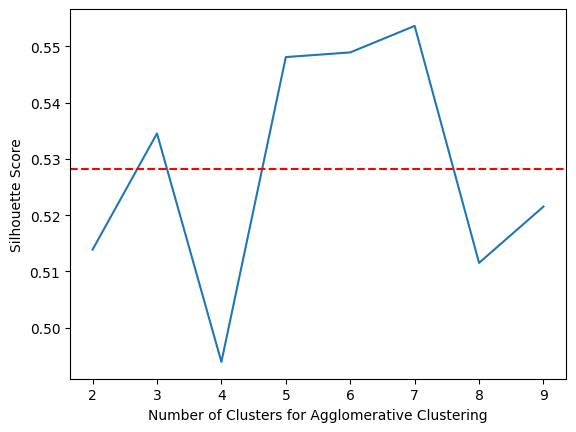

In [16]:
plt.plot(range_n_clusters, scores_agglo )
plt.axhline( y = average_agglo, color = 'red', linestyle = '--')
plt.xlabel('Number of Clusters for Agglomerative Clustering')
plt.ylabel('Silhouette Score')
plt.show()

Cluster 1 has 238 observations
Cluster 2 has 255 observations


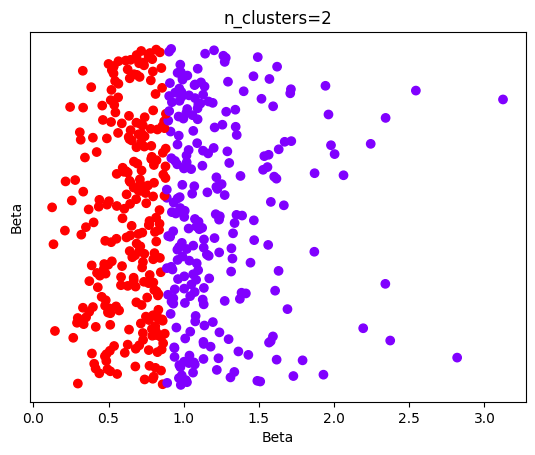

Cluster 1 has 221 observations
Cluster 2 has 255 observations
Cluster 3 has 17 observations


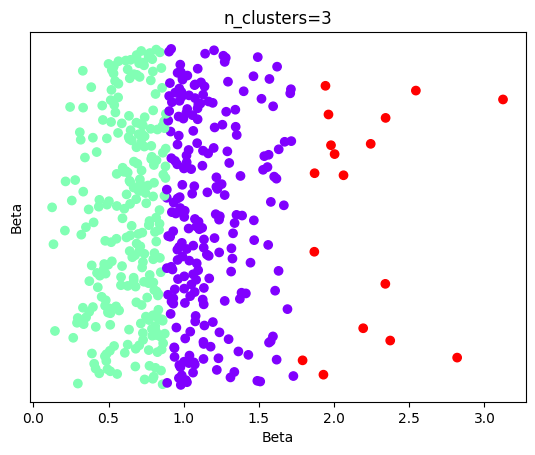

Cluster 1 has 255 observations
Cluster 2 has 80 observations
Cluster 3 has 17 observations
Cluster 4 has 141 observations


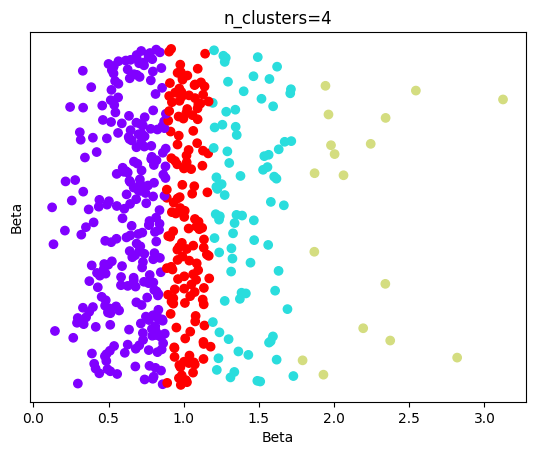

Cluster 1 has 80 observations
Cluster 2 has 165 observations
Cluster 3 has 17 observations
Cluster 4 has 141 observations
Cluster 5 has 90 observations


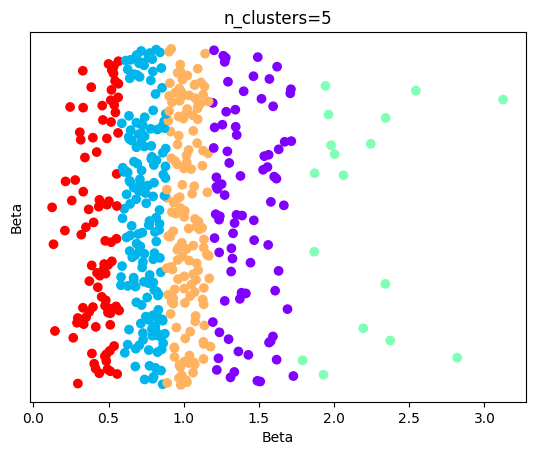

Cluster 1 has 17 observations
Cluster 2 has 165 observations
Cluster 3 has 48 observations
Cluster 4 has 141 observations
Cluster 5 has 90 observations
Cluster 6 has 32 observations


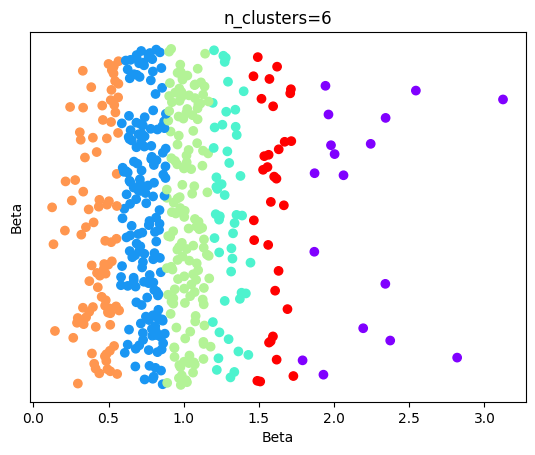

Cluster 1 has 165 observations
Cluster 2 has 90 observations
Cluster 3 has 48 observations
Cluster 4 has 141 observations
Cluster 5 has 14 observations
Cluster 6 has 32 observations
Cluster 7 has 3 observations


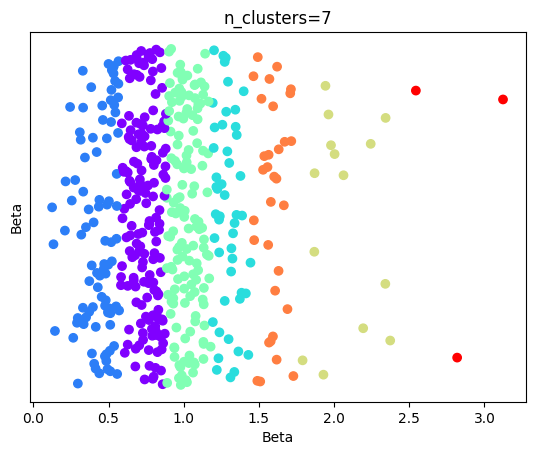

Cluster 1 has 90 observations
Cluster 2 has 141 observations
Cluster 3 has 48 observations
Cluster 4 has 86 observations
Cluster 5 has 14 observations
Cluster 6 has 32 observations
Cluster 7 has 3 observations
Cluster 8 has 79 observations


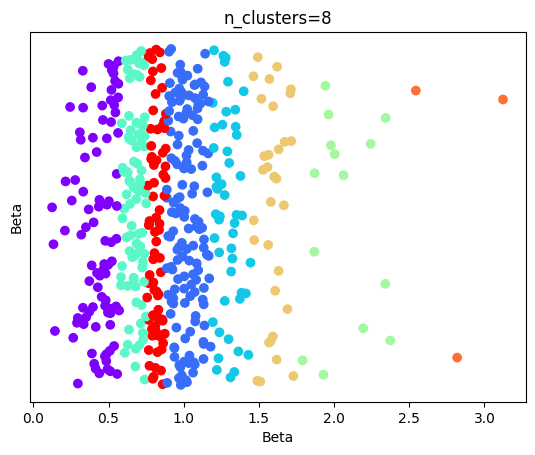

Cluster 1 has 141 observations
Cluster 2 has 14 observations
Cluster 3 has 48 observations
Cluster 4 has 86 observations
Cluster 5 has 67 observations
Cluster 6 has 32 observations
Cluster 7 has 3 observations
Cluster 8 has 79 observations
Cluster 9 has 23 observations


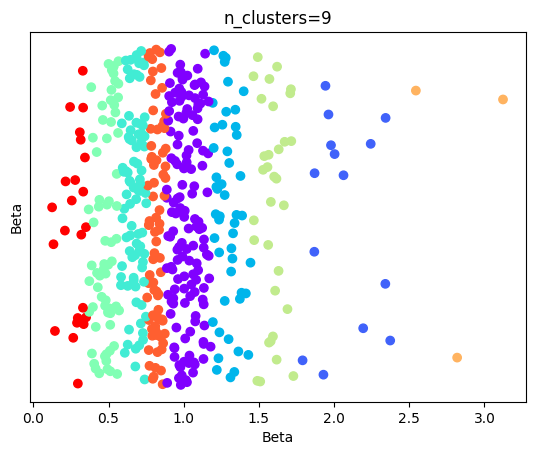

In [17]:
for n_clusters in range_n_clusters:
    model = AgglomerativeClustering(n_clusters = n_clusters)
    labels = model.fit_predict(X)
    # Create scatter plot of data points colored by cluster label
    plt.scatter(X, df_betas['Stock_Name'], c=labels, cmap='rainbow')
    plt.xlabel('Beta')
    plt.ylabel('Beta')
    plt.title(f"n_clusters={n_clusters}")
    cluster_counts = np.bincount(labels)
    for i in range(n_clusters):
        print(f"Cluster {i+1} has {cluster_counts[i]} observations")
    plt.yticks([])
    plt.show()

3. c. Implementation of agglomerative clustering.

In [18]:
optimal_n_clusters = 7
agglom = AgglomerativeClustering(n_clusters = optimal_n_clusters)
cluster_labels = agglom.fit_predict(X)
df_betas_agglom = df_betas.copy(deep = True)
df_betas_agglom['Cluster'] = cluster_labels
df_betas_agglom

,Stock_Name,Beta,Cluster
0,MMM,0.980782,3
1,AOS,0.860069,0
2,ABT,0.296217,1
3,ABBV,0.890313,3
4,ACN,1.021797,3
...,...,...,...
488,WELL,0.902716,3
489,WST,0.717507,0
490,WDC,1.201835,2
491,WY,0.817093,0


/home/codespace/.local/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


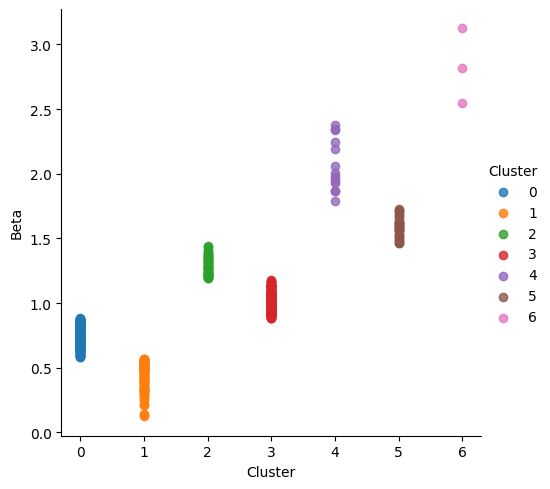

In [19]:
cluster7 = sns.lmplot(data = df_betas_agglom, x = 'Cluster', y = 'Beta', hue = 'Cluster', legend = True, legend_out = True);

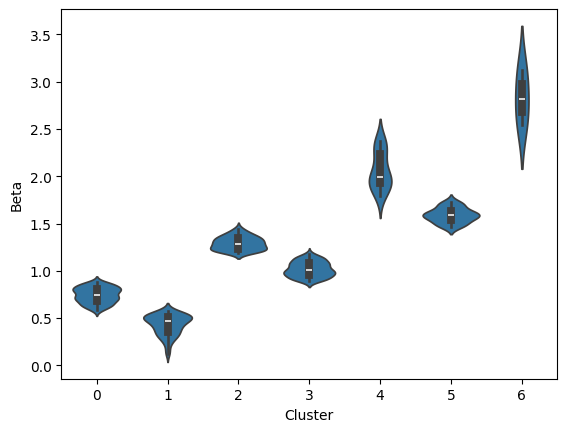

In [20]:
sns.violinplot(x = 'Cluster', y = 'Beta', data = df_betas_agglom)
plt.show()

**4. Stock segmentation with K-means**

4. b. Identify the best value of K-number of clusters.

In [21]:
df_betas_av = pd.concat([df_betas, df_av], axis=1)
XX = (df_betas_av[['Beta','Annual_Volatility']])
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
scores_KMeans = []
for n_clusters in range_n_clusters:
    KMeansm = KMeans(n_clusters = n_clusters)
    KMeansm.fit(XX)
    labels = KMeansm.labels_
    scores_KMeans.append(silhouette_score(XX, labels))

Looking at the scores, and their average.

In [22]:
print(list(scores_KMeans))
average_KMeans = sum(scores_KMeans)/len(scores_KMeans)
print(average_KMeans)

[0.5568413888397155, 0.5029932714175194, 0.4908128767585973, 0.48224971414924656, 0.4604048596198805, 0.43598319852401624, 0.42259499878596984, 0.40760437700518587]
0.46993558563751636


Graphing.

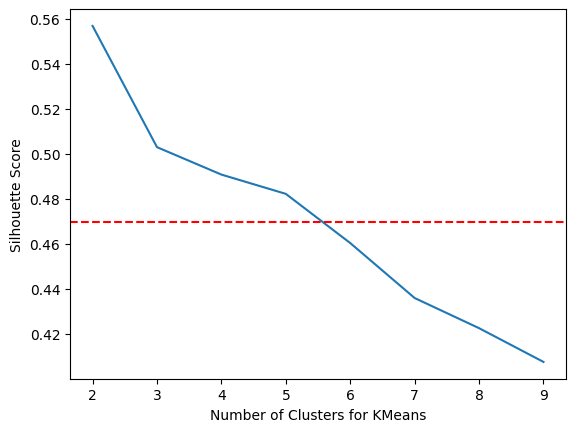

In [23]:
plt.plot(range_n_clusters, scores_KMeans )
plt.axhline( y = average_KMeans, color = 'red', linestyle = '--')
plt.xlabel('Number of Clusters for KMeans')
plt.ylabel('Silhouette Score')
plt.show()

Cluster 1 has 388 observations
Cluster 2 has 105 observations


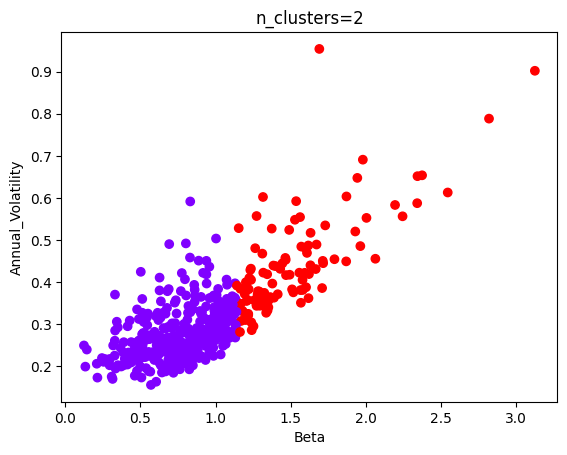

Cluster 1 has 220 observations
Cluster 2 has 51 observations
Cluster 3 has 222 observations


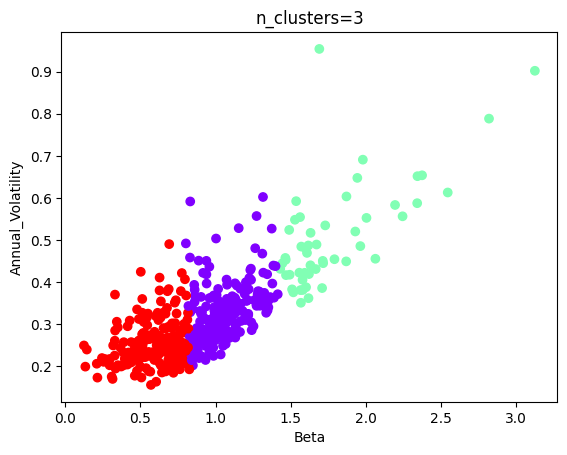

Cluster 1 has 83 observations
Cluster 2 has 172 observations
Cluster 3 has 17 observations
Cluster 4 has 221 observations


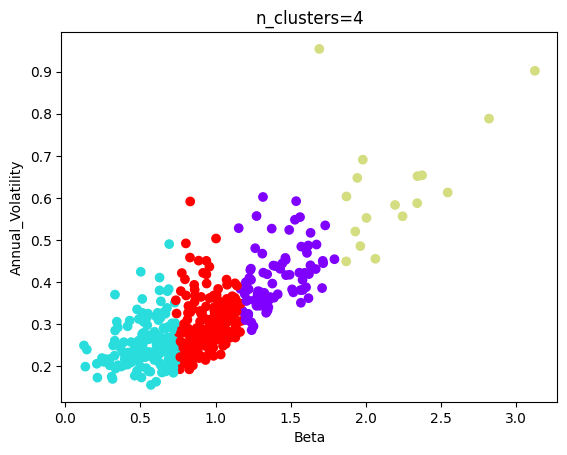

Cluster 1 has 64 observations
Cluster 2 has 166 observations
Cluster 3 has 15 observations
Cluster 4 has 96 observations
Cluster 5 has 152 observations


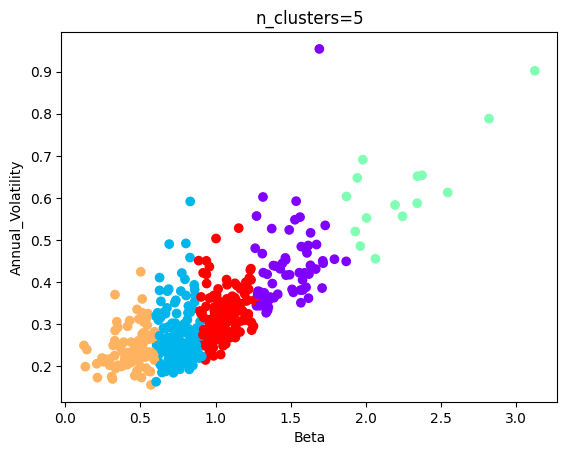

Cluster 1 has 148 observations
Cluster 2 has 40 observations
Cluster 3 has 11 observations
Cluster 4 has 90 observations
Cluster 5 has 134 observations
Cluster 6 has 70 observations


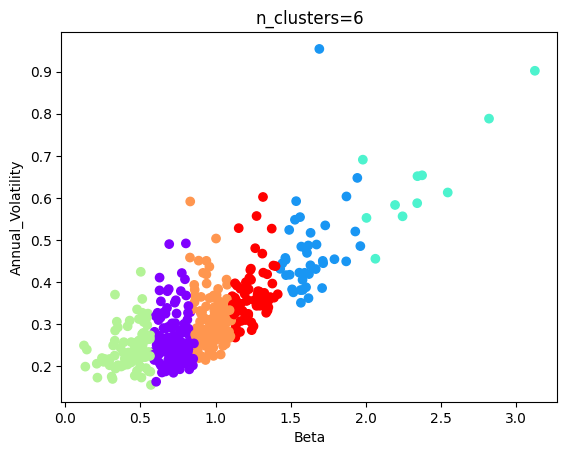

Cluster 1 has 39 observations
Cluster 2 has 144 observations
Cluster 3 has 92 observations
Cluster 4 has 131 observations
Cluster 5 has 2 observations
Cluster 6 has 13 observations
Cluster 7 has 72 observations


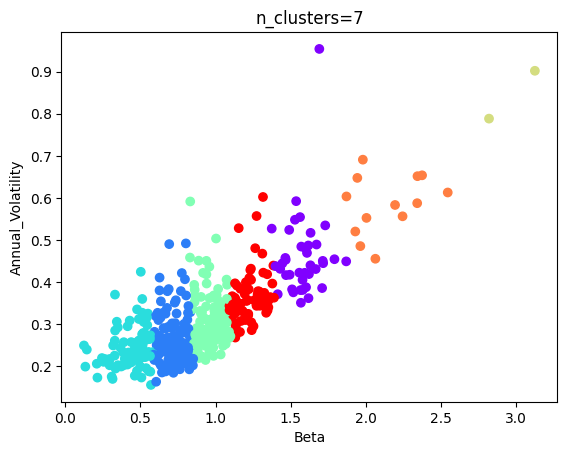

Cluster 1 has 115 observations
Cluster 2 has 13 observations
Cluster 3 has 101 observations
Cluster 4 has 51 observations
Cluster 5 has 63 observations
Cluster 6 has 113 observations
Cluster 7 has 35 observations
Cluster 8 has 2 observations


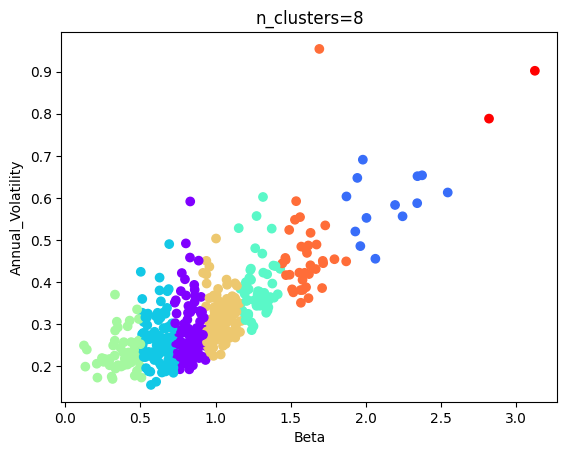

Cluster 1 has 87 observations
Cluster 2 has 33 observations
Cluster 3 has 106 observations
Cluster 4 has 6 observations
Cluster 5 has 34 observations
Cluster 6 has 100 observations
Cluster 7 has 53 observations
Cluster 8 has 12 observations
Cluster 9 has 62 observations


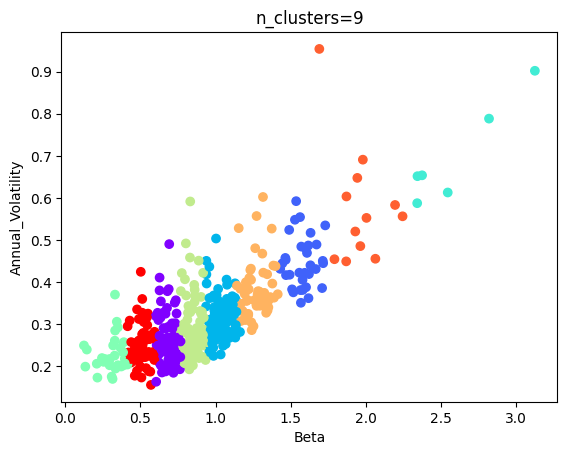

In [24]:
for n_clusters in range_n_clusters:
    model = KMeans(n_clusters = n_clusters)
    labels = model.fit_predict(XX)
    # Create scatter plot of data points colored by cluster label
    plt.scatter(XX['Beta'], XX['Annual_Volatility'], c = labels, cmap = 'rainbow')
    plt.xlabel('Beta')
    plt.ylabel('Annual_Volatility')
    plt.title(f"n_clusters={n_clusters}")
    cluster_counts = np.bincount(labels)
    for i in range(n_clusters):
        print(f"Cluster {i+1} has {cluster_counts[i]} observations")
    #plt.yticks([])
    plt.show()

4. c. Implementation of K-Means.

In [25]:
optimal_n_clusters = 5
KMeansm = KMeans(n_clusters = optimal_n_clusters)
cluster_labels = KMeansm.fit_predict(XX)
df_betas_av_KMeansm = df_betas_av.copy(deep = True)
df_betas_av_KMeansm['Cluster'] = cluster_labels
df_betas_av_KMeansm

,Stock_Name,Beta,Stock_Name,Annual_Volatility,Cluster
0,MMM,0.980782,MMM,0.295654,0
1,AOS,0.860069,AOS,0.278673,4
2,ABT,0.296217,ABT,0.217839,1
3,ABBV,0.890313,ABBV,0.219958,4
4,ACN,1.021797,ACN,0.270331,0
...,...,...,...,...,...
488,WELL,0.902716,WELL,0.272685,4
489,WST,0.717507,WST,0.191335,4
490,WDC,1.201835,WDC,0.400050,0
491,WY,0.817093,WY,0.245157,4


5. b. Implement the stock portfolio.

In [26]:
for i in range(len(df_betas_agglom)):
  now_stock = df_betas_agglom.loc[i, 'Stock_Name']
  if now_stock in SP500_close.columns:
    df_betas_agglom.loc[i,'start_close'] = SP500_close.iloc[0][now_stock]
    df_betas_agglom.loc[i,'end_close'] = SP500_close.iloc[752][now_stock]
stocks_group = df_betas_agglom.groupby('Cluster')
group_start = stocks_group['start_close'].aggregate(np.sum)
group_end = stocks_group['end_close'].aggregate(np.sum)
group_profit = (group_end - group_start) / group_start
print(group_profit)
portfolio_profit = 0.2*(group_profit[0] + group_profit[1] + group_profit[2]) + 0.1*(group_profit[3] + group_profit[4] + group_profit[5] + group_profit[6])
percentage = "{:.2f}%".format(portfolio_profit * 100)
print("The profit of the stock portfolio is ", percentage)

Cluster
0    0.237551
1    0.279365
2    0.118628
3    0.295313
4   -0.200894
5    0.276852
6    1.638933
dtype: float64
The profit of the stock portfolio is  32.81%


/tmp/ipykernel_46058/2234015142.py:7: FutureWarning: The provided callable <function sum at 0x74c2803205e0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_start = stocks_group['start_close'].aggregate(np.sum)
/tmp/ipykernel_46058/2234015142.py:8: FutureWarning: The provided callable <function sum at 0x74c2803205e0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_end = stocks_group['end_close'].aggregate(np.sum)
